# Explore here

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [2]:
df = pd.read_csv('https://breathecode.herokuapp.com/asset/internal-link?id=809&path=housing.csv')
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [3]:
df = df[['MedInc','Latitude','Longitude']]
df.head(10)

,MedInc,Latitude,Longitude
0,8.3252,37.88,-122.23
1,8.3014,37.86,-122.22
2,7.2574,37.85,-122.24
3,5.6431,37.85,-122.25
4,3.8462,37.85,-122.25
5,4.0368,37.85,-122.25
6,3.6591,37.84,-122.25
7,3.1200,37.84,-122.25
8,2.0804,37.84,-122.26
9,3.6912,37.84,-122.25


In [4]:
print(f'Las dimensiones del datset son: {df.shape}')
df.describe()

Las dimensiones del datset son: (20640, 3)


,MedInc,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000
mean,3.870671,35.631861,-119.569704
std,1.899822,2.135952,2.003532
min,0.499900,32.540000,-124.350000
25%,2.563400,33.930000,-121.800000
50%,3.534800,34.260000,-118.490000
75%,4.743250,37.710000,-118.010000
max,15.000100,41.950000,-114.310000


In [5]:
duplicados = df.duplicated()
num_duplicados = duplicados.sum()
print(num_duplicados)

5


Dado que solo tenemos 5 duplicados frente a 20640 que contien el dataset, estos van a ser eliminados.

In [6]:
#Eliminar duplicados
df = df.drop_duplicates()
print(f'Las dimensiones del datset sin duplicados son: {df.shape}')
df.head(5)

Las dimensiones del datset sin duplicados son: (20635, 3)


,MedInc,Latitude,Longitude
0,8.3252,37.88,-122.23
1,8.3014,37.86,-122.22
2,7.2574,37.85,-122.24
3,5.6431,37.85,-122.25
4,3.8462,37.85,-122.25


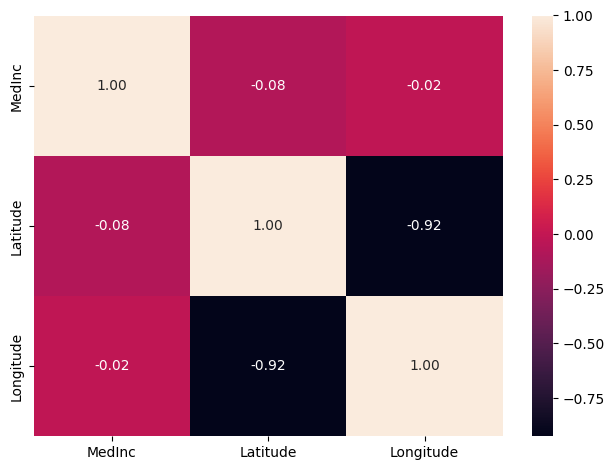

In [7]:
#Análisis de correlaciones
sns.heatmap(df[["MedInc", "Latitude", "Longitude"]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()
plt.show()
     

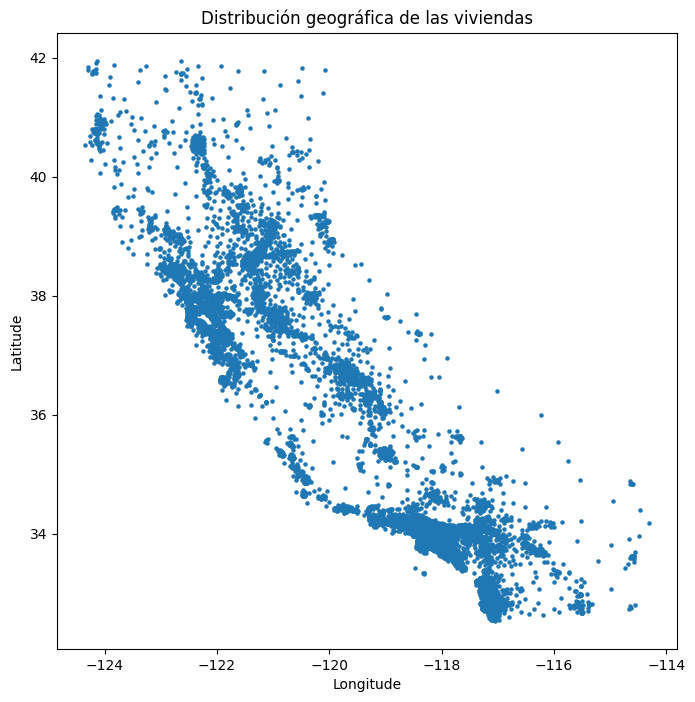

In [8]:
plt.figure(figsize=(8, 8))
plt.scatter(df["Longitude"], df["Latitude"], s=5)
plt.title("Distribución geográfica de las viviendas")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

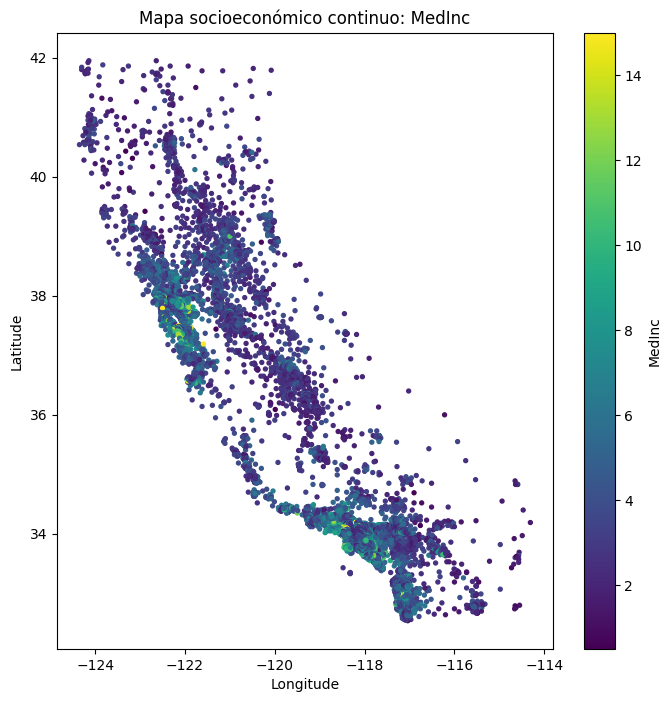

In [9]:
plt.figure(figsize=(8, 8))
plt.scatter(
    df["Longitude"], 
    df["Latitude"], 
    c=df["MedInc"], 
    cmap="viridis",
    s=8
)
plt.colorbar(label="MedInc")
plt.title("Mapa socioeconómico continuo: MedInc")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

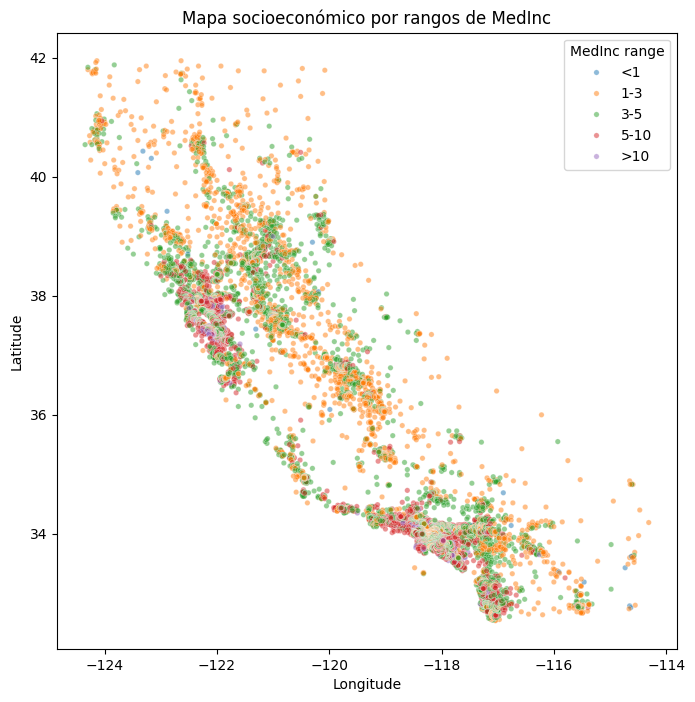

In [10]:
bins = [0, 1, 3, 5, 10, 20]
labels = ["<1", "1-3", "3-5", "5-10", ">10"]
df["inc_range"] = pd.cut(df["MedInc"], bins=bins, labels=labels)

plt.figure(figsize=(8, 8))
sns.scatterplot(
    data=df,
    x="Longitude",
    y="Latitude",
    hue="inc_range",
    alpha=0.5,
    s=15
)
plt.title("Mapa socioeconómico por rangos de MedInc")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(title="MedInc range")
plt.show()

In [11]:
X = df.drop(['inc_range'], axis = 1)
X_train, X_test = train_test_split(X, test_size = 0.2, random_state = 42)
X_train

,MedInc,Latitude,Longitude
19985,3.1453,36.20,-119.31
11235,5.2384,33.81,-117.96
2271,3.5542,36.78,-119.80
8660,4.3594,33.85,-118.39
6250,3.4722,34.04,-117.98
...,...,...,...
11288,5.2370,33.80,-117.95
11968,1.9052,34.00,-117.41
5392,3.1827,34.04,-118.37
860,5.7192,37.58,-121.96


In [12]:
X_test

,MedInc,Latitude,Longitude
8572,8.4680,33.90,-118.41
1712,3.9722,37.97,-122.32
15916,3.4583,37.74,-122.42
5196,1.6625,33.94,-118.27
13583,1.5156,34.13,-117.29
...,...,...,...
8470,4.2596,33.91,-118.31
2144,2.7850,36.77,-119.76
3665,3.5521,34.22,-118.37
7111,4.4954,33.90,-118.02


In [ ]:
# Instanciar el escalador
scaler = StandardScaler()

# Entrenar el escalador con los datos de entrenamiento
scaler.fit(X_train)

# Aplicar el escalador en ambos
X_train_final = scaler.transform(X_train)
X_train_final = pd.DataFrame(X_train_final, index = X_train.index, columns = X_train.columns)

X_test_final = scaler.transform(X_test)
X_test_final = pd.DataFrame(X_test_final, index = X_test.index, columns = X_test.columns)

X_train_final.head()